# Import Libraries

In [4]:
from dash import Dash, html, dcc, callback, Output, Input, State
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

import json
import os

# Initialize App 

In [5]:
app = Dash(
    __name__,
    external_stylesheets=[
        dbc.themes.BOOTSTRAP,
        dbc.icons.FONT_AWESOME
    ]
)

# Load Data

In [6]:
athlete_events_df = pd.read_csv("./assets/athlete_events.csv")
noc_regions = pd.read_csv("./assets/noc_regions.csv")

# athlete_events_df = athlete_events_df[athlete_events_df["Medal"].notna()]

# athlete_events_df.groupby(["Weight"])["Weight"].count().reset_index(name="height_count").sort_values(by=["height_count"], ascending=False)

# athlete_events_df.groupby(["Name", "Medal"])["Medal"].count()
# noc_medals_df = athlete_events_df.merge(noc_regions, on="NOC", how="left").rename(columns={"region":"Region"})
# noc_medals_df = noc_medals_df.groupby(["NOC", "Medal"])["Medal"].count().unstack(fill_value=0).stack().reset_index(name="Medal_Count")
# noc_medals_df["United States of America"]
# noc_medals_df[noc_medals_df["NOC"] == "USA"]

# athlete_events_df[(athlete_events_df["NOC"] == "USA") & (athlete_events_df["Medal"].notna())]
athlete_events_df.sort_values(by=["Weight"], ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN
75031,38075,Marek Galiski,M,29.0,200.0,190.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
237040,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


# Total Medal Count by Height and Weight (Heatmap Figure)

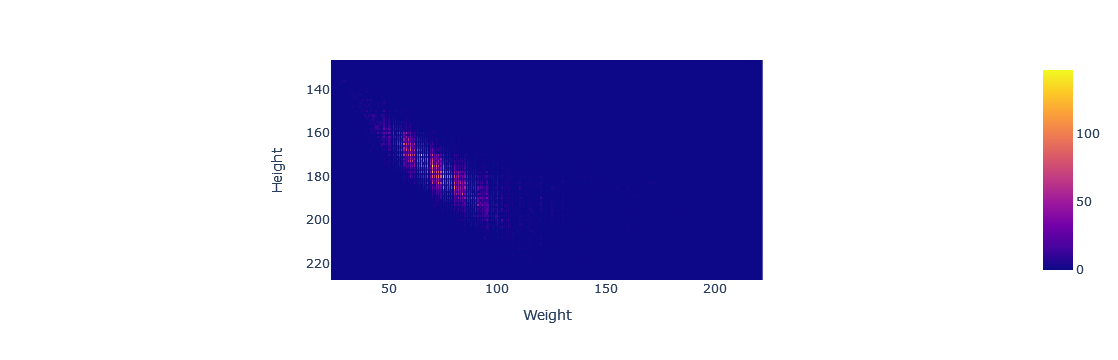

In [113]:
height_weight_medal_df = athlete_events_df.dropna(subset=["Height", "Weight"])
height_weight_medal_df = height_weight_medal_df.groupby(["Height", "Weight"])["Medal"].count().reset_index(name="Medal_Count")
height_weight_medal_df = pd.pivot_table(height_weight_medal_df, index="Height", columns="Weight", values="Medal_Count")
height_weight_medal_df = height_weight_medal_df.fillna(0)
# height_weight_medal_df.pivot(index="Height", columns="Weight", values="Medal_Count")
height_weight_medal_df

px.imshow(height_weight_medal_df).show()

# Interactive Map by Country (Choropleth Figure)

In [1]:
# Example Dataset and Choropleth Figure

df = pd.read_csv("./assets/aid_data.csv")
df = df.dropna()

# Dataframe for sum of donations given grouped by country
donors_df = df.rename(columns={"donor":"country"}).sort_values(by=["commitment_amount_usd_constant"], ascending=True).groupby(["country"])["commitment_amount_usd_constant"].sum().reset_index(name="total_donated")

# Dataframe for sum of donations received grouped by country
recipients_df = df.rename(columns={"recipient":"country"}).groupby(["country"])["commitment_amount_usd_constant"].sum().reset_index(name="total_received")

# Dataframe for net donations grouped by country
combined_df = pd.merge(donors_df, recipients_df, how="outer", on="country").fillna(0)
combined_df["net"] = combined_df["total_donated"] - combined_df["total_received"]

# Choropleth figure
fig_q1 = px.choropleth(combined_df,
                        title="Net Donations by Country",
                        locations="country",
                        locationmode="country names",
                        color="net",
                        color_continuous_scale="PiYg",
                        hover_name="country",
                        range_color=[-4e6, 4e6],
                        projection="natural earth")

fig_q1.show()

NameError: name 'pd' is not defined

# Dash Layout

In [4]:
fig_q1.update_layout(clickmode='event+select')

country = None

app.layout = html.Div([
    dcc.Graph(
        id="test-map",
        figure=fig_q1
    ),
    # html.H1(id='hover-data', children=[
    #     "Test Header"
    # ]),
    dbc.Modal(
        [
            dbc.ModalHeader(dbc.ModalTitle(id="modal-text", children=[
                "Placeholder"
            ]))
        ],
        id="modal-sm",
        size="sm",
        is_open=False,
    )
])

# @callback(
#     Output('hover-data', 'children'),
#     Input('test-map', 'clickData')
# )
# def display_click_data(clickData):
#     # return json.dumps(clickData, indent=2)["points"][0]
#     if clickData:
#         country = clickData["points"][0]["location"]
#         return clickData["points"][0]["location"]
#     country = None
#     return None

@callback([
        Output("modal-text", "children"),
        Output("modal-sm", "is_open")
    ],
    [
        Input("test-map", "clickData")
    ],
    [
        State("modal-sm", "is_open")
    ]
)
def update_modal(clickData, is_open):
    # print(clickData)
    if clickData:
        return clickData["points"][0]["location"], not is_open
    return None, is_open
    # return clickData

# def toggle_modal(n1, is_open):
#     if n1:
#         print(is_open)
#         return not is_open
#     print(is_open)
#     return is_open

# app.callback(
#     Output("modal-sm", "is_open"),
#     Input("open-sm", "n_clicks"),
#     State("modal-sm", "is_open"),
# )(toggle_modal)

# Run Dash App

In [5]:
app.run_server(debug=True)